# Delivery Time Analysis
### Tujuan projek ini adalah menganalisis faktor-faktor yang memengaruhi delivery time pada pengiriman makanan. Analisis ini akan membantu menjawab beberapa pertanyaan berikut:
1. Variabel apa yang paling memengaruhi keterlambatan pengiriman?
2. Bagaimana kondisi terntentu (cuaca, traffic, lokasi) berdampak pada durasi pengiriman?
3. apa insight dan rekomendasi yang dapat membantu perusahaan meningkatkan efisiensi pengiriman?
## Analisis menggunakan dataset Food Delivery Time Prediction dari Kaggle yang memuat variabel;
- Order_ID: Unique identifier for each order.
- Distance_km: The delivery distance in kilometers.
- Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.
- Traffic_Level: Traffic conditions categorized as Low, Medium, or High.
- Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.
- Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.
- Preparation_Time_min: The time required to prepare the order, measured in minutes.
- Courier_Experience_yrs: Experience of the courier in years.
- Delivery_Time_min: The total delivery time in minutes (target variable).

### Load Data & Overview

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Food_Delivery_Times.csv")
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

### Data Cleaning

 Apabila dilihat dari missing value yg hanya 30 (3%), relatif kecil dan aman untuk di hapus, tetapi yang tidak diketahui adalah apakah persebaran missing value terdapat dalam baris data yang sama? apabila tidak, maka bukan hanya 30 baris yang akan terhapus, melainkan lebih dari itu dan dapat mengubah distribusi dan menghilangkan pola penting. Oleh karena itu, untuk data numerik akan diimputasi berdasarkan median dan data kategori diimputasi berdasarkan mode 

Menangani Missing Value

In [6]:
num_cols = ['Courier_Experience_yrs']
cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day']

In [7]:
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [8]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

Deteksi Outliers

In [9]:
num_cols = ['Distance_km','Preparation_Time_min','Courier_Experience_yrs','Delivery_Time_min']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")


Distance_km: 0 outliers
Preparation_Time_min: 0 outliers
Courier_Experience_yrs: 0 outliers
Delivery_Time_min: 6 outliers


In [10]:
outlier_values = outliers['Delivery_Time_min'].tolist()
print(outlier_values)

[123, 141, 153, 141, 126, 122]


Karena outliers yang ada masih wajar dalam satuan waktu, maka tidak akan dihapus/ditangani

### EDA

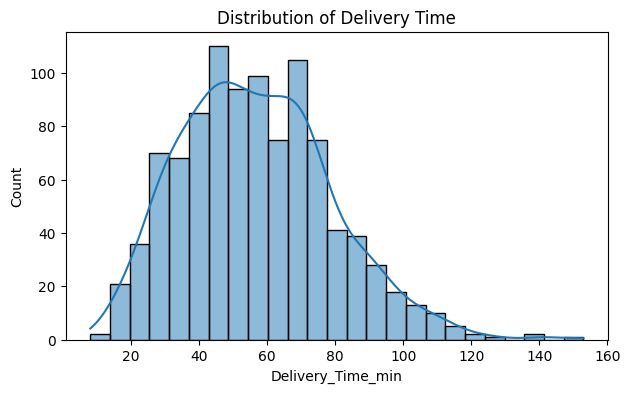

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(df['Delivery_Time_min'], kde=True)
plt.title("Distribution of Delivery Time")
plt.show()


# Melihat korelasi Variabel Numerik

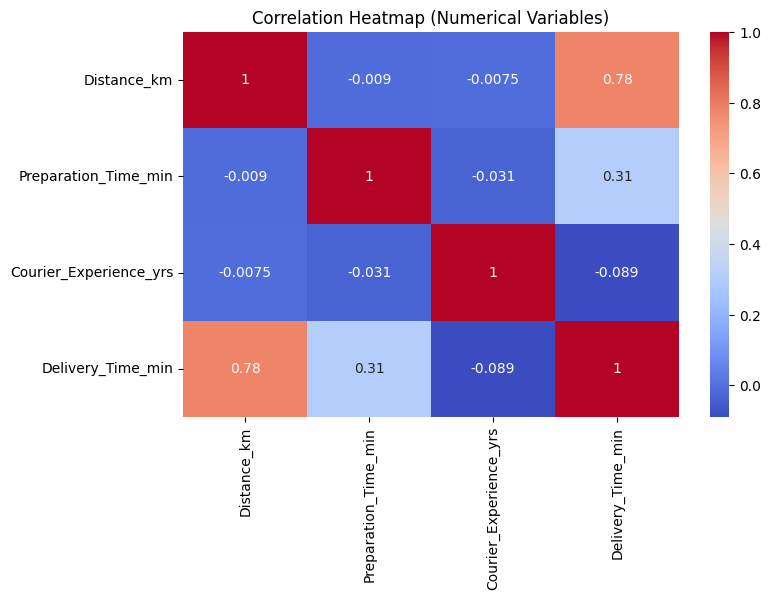

In [12]:
numerical = ['Distance_km', 'Preparation_Time_min',
             'Courier_Experience_yrs', 'Delivery_Time_min']

plt.figure(figsize=(8,5))
sns.heatmap(df[numerical].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Variables)")
plt.show()

Berdasarkan hasil korelasi heatmap, bisa dilihat bahwa yang paling mempengaruhi waktu pengiriman adalah jarak dan waktu persiapan pesanan, sedangkan lama pengalaman kurir tidak terlalu mempengaruhi waktu pengiriman.

## Melihat Korelasi Variabel Kategorikal

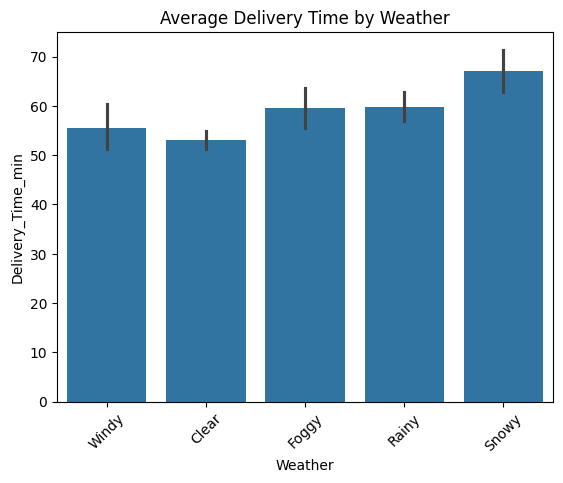

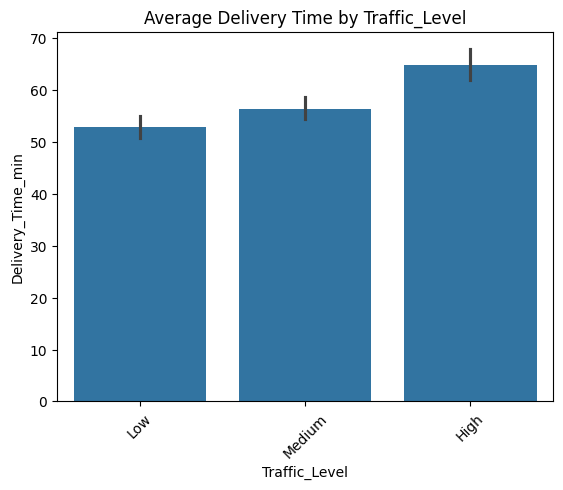

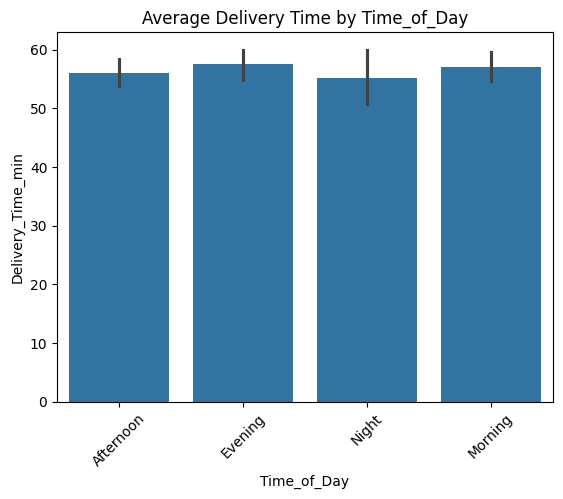

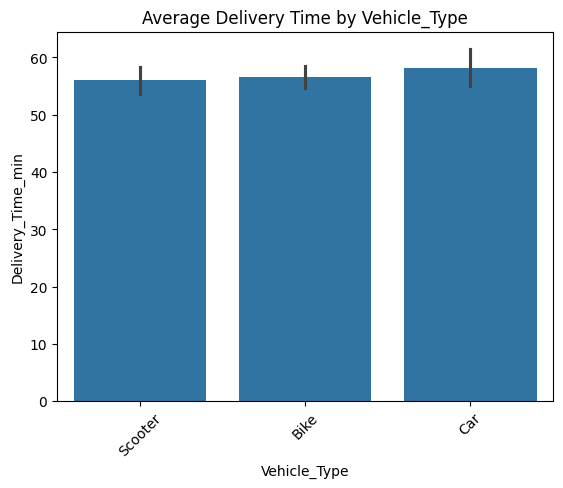

In [13]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in categorical_cols:
    sns.barplot(x=df[col], y=df['Delivery_Time_min'])
    plt.title(f"Average Delivery Time by {col}")
    plt.xticks(rotation=45)
    plt.show()

berdasarkan hasil barplot: <br>
**1. Delivery Time vs Weather**
Rata rata waktu pengiriman paling cepat adalah ketika cuaca sedang clear, lalu diikuti dengan windy, rainy, foggy dan paling lama adalah ketika cuaca Snowy <br>
**2. Delivery Time vs traffic level**
Tentu saja ketika level traffic sedang tinggi maka rata rata waktu pengiriman lebih lama <br>
**3. Delivery Time vs time of day**
Ketika malam, waktu pengiriman cenderung lebih cepat, dan rata rata waktu pengiriman yang lama adalah di siang hari <br>
**4. Delivery Time vs Vehicle type**
kurir yang menggunakan scooter/motor cenderung mengirim pesanan lebih cepat dibanding menggunakan bike/sepeda atau mobil.


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# --- DROP fitur yang tidak boleh digunakan ---
df_clean = df.drop(columns=['Order_ID'])

# --- Pisahkan X dan y ---
X = df_clean.drop("Delivery_Time_min", axis=1)
y = df_clean["Delivery_Time_min"]

# --- One-hot encoding ---
X_encoded = pd.get_dummies(X, drop_first=True)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# --- Model ---
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# --- Feature Importance ---
importance = pd.Series(model.feature_importances_, index=X_encoded.columns)
importance_sorted = importance.sort_values(ascending=False)
# Gabungkan importance berdasarkan prefix sebelum underscore
grouped_importance = importance.groupby(lambda x: x.split('_')[0]).sum()
grouped_importance.sort_values(ascending=False)


grouped_importance.sort_values(ascending=False)



Distance       0.698920
Preparation    0.158465
Courier        0.043391
Weather        0.033584
Traffic        0.026252
Time           0.022484
Vehicle        0.016903
dtype: float64

<Axes: title={'center': 'Grouped Feature Importance'}>

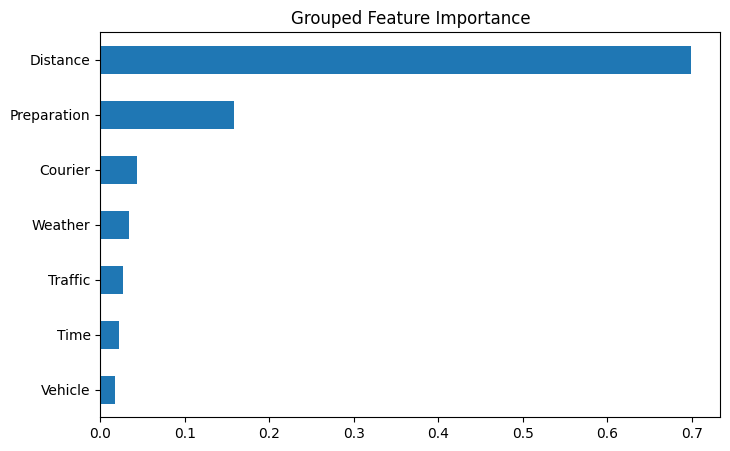

In [18]:
grouped_importance.sort_values().plot(kind='barh', figsize=(8,5), title="Grouped Feature Importance")


Nilai korelasi menunjukkan hubungan linear antar variabel, sehingga Courier Experience tampak tidak berhubungan dengan Delivery Time. Namun, Random Forest mengukur kontribusi fitur melalui pengurangan impurity secara non-linear dan mempertimbangkan interaksi antar fitur. Oleh karena itu, meskipun korelasinya rendah, Courier Experience tetap memiliki nilai feature importance karena berperan dalam kondisi tertentu atau dalam kombinasi dengan fitur lain.